In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [2]:
data_path=r'C:\Users\mohamed\Desktop\Python\dataset\HousePrice.csv'

In [3]:
data=pd.read_csv(data_path)

In [4]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
data.select_dtypes(np.object).columns

C:\Users\mohamed\AppData\Local\Temp/ipykernel_16500/447294167.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data.select_dtypes(np.object).columns


Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [6]:
df=data.copy()

# Encoding + Imputation

In [7]:
for col in df.select_dtypes('object').columns:
    df[col]=df[col].fillna(df[col].mode()[0])
    df=pd.concat([df,pd.get_dummies(df[col])],axis=1)
    df=df.drop(col,axis=1)
df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,ConLw,New,Oth,WD,Abnorml,AdjLand,Alloca,Family,Normal,Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,0,0,1,0,0,0,0,1,0
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,0,0,0,1,0,0,0,0,1,0
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,0,0,1,0,0,0,0,1,0
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,0,0,0,1,0,0,0,0,1,0


<AxesSubplot:>

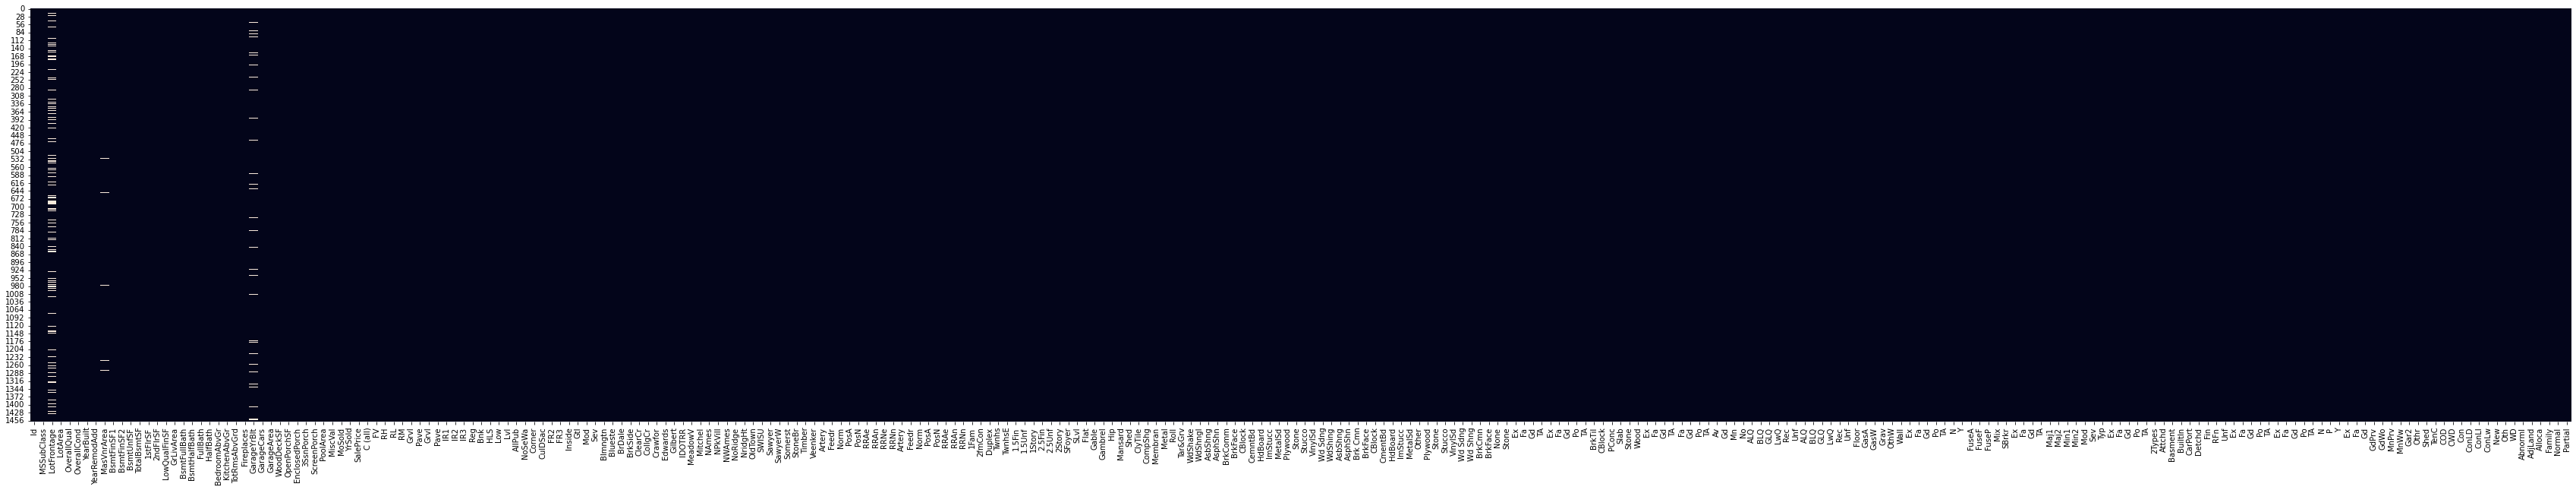

In [8]:
plt.figure(figsize=(60,10))
sns.heatmap(df.isna(),cbar=False)

In [9]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=False).head(4)

LotFrontage    0.177397
GarageYrBlt    0.055479
MasVnrArea     0.005479
Id             0.000000
dtype: float64

In [10]:
df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mode()[0])

In [11]:
df['GarageYrBlt']=df['GarageYrBlt'].fillna(df['GarageYrBlt'].mode()[0])
df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0])

<AxesSubplot:>

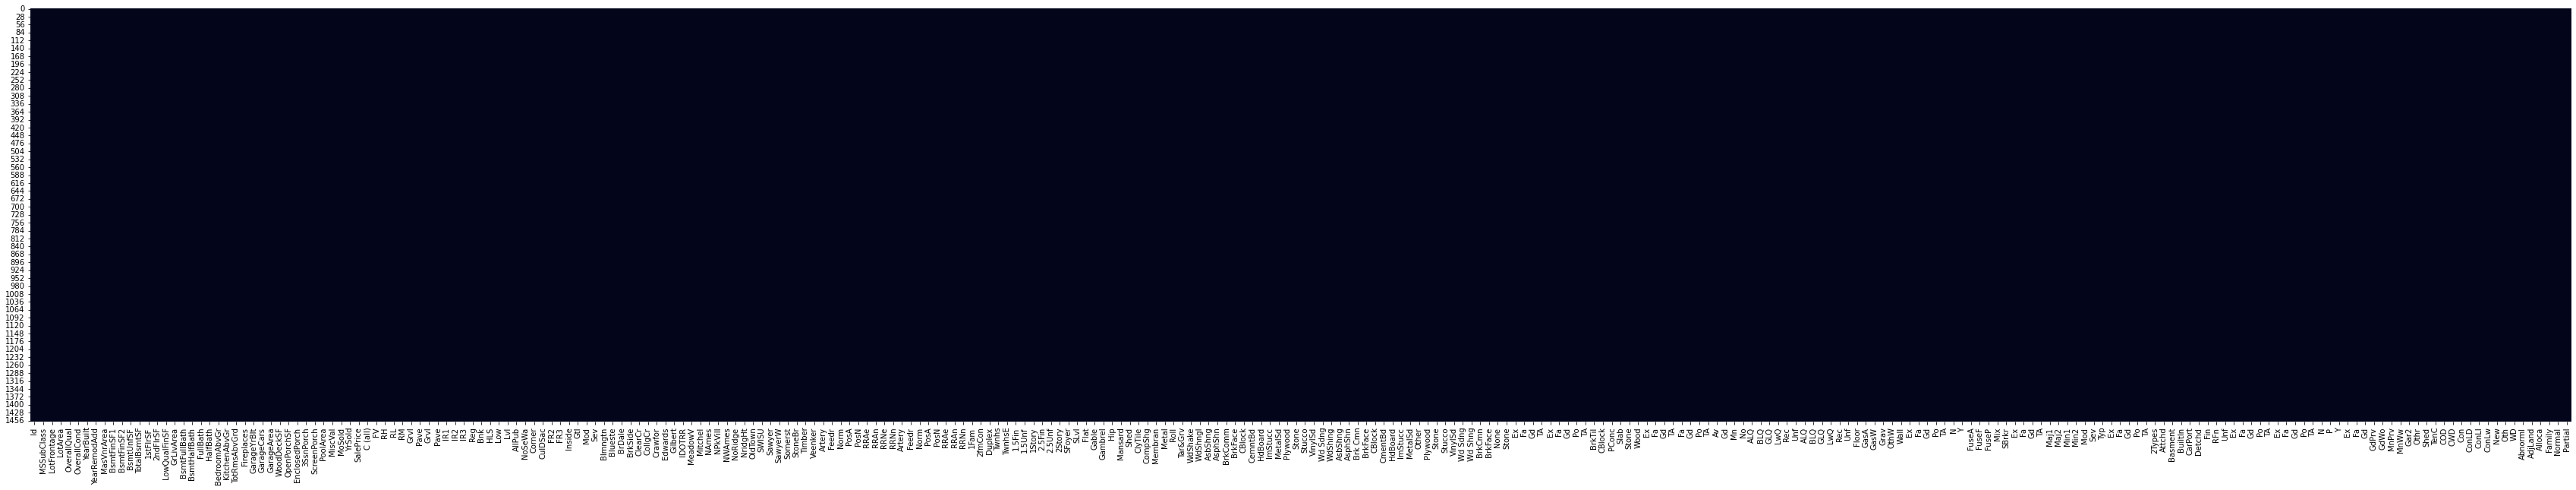

In [12]:
plt.figure(figsize=(60,10))
sns.heatmap(df.isna(),cbar=False)

# Training

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
train_set,test_set=train_test_split(df,test_size=0.2,random_state=False)

In [15]:
x_train=train_set.drop('SalePrice',axis=1)
y_train=train_set['SalePrice']

In [16]:
from sklearn.ensemble import RandomForestRegressor

In [17]:
model=RandomForestRegressor()

In [18]:
model.fit(x_train,y_train)

RandomForestRegressor()

In [19]:
x_test=test_set.drop('SalePrice',axis=1)
y_test=test_set['SalePrice']

In [20]:
y_pred=model.predict(x_test)

In [21]:
model.score(x_test,y_test)

0.8307406846318236

# Best Correlation

<AxesSubplot:>

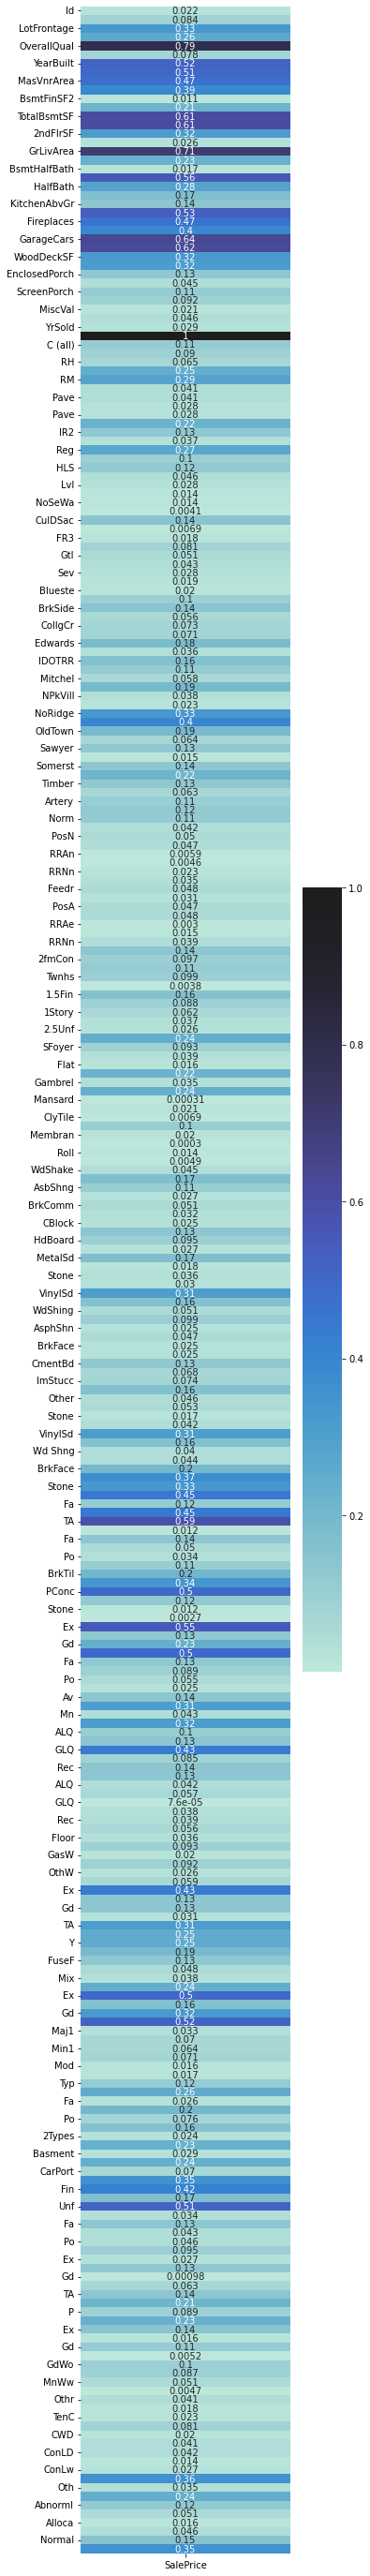

In [87]:
plt.figure(figsize=(5,50))
sns.heatmap(df.corr().abs()[['SalePrice']],annot=True,center=1)

In [49]:
best_corr_col=df.columns[(df.corr()>0.5)['SalePrice']]
best_corr_col

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice', 'Ex', 'Ex'],
      dtype='object')

In [50]:
df_best_corr=df[best_corr_col].copy()

In [51]:
df_best_corr.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,...,Ex,Ex,Ex,Ex,Ex,Ex,Ex,Ex,Ex,Ex
0,7,2003,2003,856,856,1710,2,8,2,548,...,0,0,0,0,1,0,0,0,0,0
1,6,1976,1976,1262,1262,1262,2,6,2,460,...,0,0,0,0,1,0,0,0,0,0
2,7,2001,2002,920,920,1786,2,6,2,608,...,0,0,0,0,1,0,0,0,0,0
3,7,1915,1970,756,961,1717,1,7,3,642,...,0,0,0,0,0,0,0,0,0,0
4,8,2000,2000,1145,1145,2198,2,9,3,836,...,0,0,0,0,1,0,0,0,0,0


In [52]:
train_set_corr,test_set_corr=train_test_split(df_best_corr,test_size=0.2,random_state=False)

In [53]:
x_train_corr=train_set_corr.drop('SalePrice',axis=1)
y_train_corr=train_set_corr['SalePrice']

In [54]:
model_corr=RandomForestRegressor()

In [55]:
model_corr.fit(x_train_corr,y_train_corr)

RandomForestRegressor()

In [56]:
x_test_corr=test_set_corr.drop('SalePrice',axis=1)
y_test_corr=test_set_corr['SalePrice']

In [58]:
model_corr.score(x_test_corr,y_test_corr)

0.8574923868132014

In [88]:
best_corr_col2=df.columns[(df.corr()>0.7)['SalePrice']]
best_corr_col2

Index(['OverallQual', 'GrLivArea', 'SalePrice'], dtype='object')

In [89]:
df_best_corr2=df[best_corr_col2].copy()

In [90]:
df_best_corr2.head()

,OverallQual,GrLivArea,SalePrice
0,7,1710,208500
1,6,1262,181500
2,7,1786,223500
3,7,1717,140000
4,8,2198,250000


In [91]:
train_set_corr2,test_set_corr2=train_test_split(df_best_corr2,test_size=0.2,random_state=False)

In [92]:
x_train_corr2=train_set_corr2.drop('SalePrice',axis=1)
y_train_corr2=train_set_corr2['SalePrice']

In [93]:
model_corr2=RandomForestRegressor()

In [94]:
model_corr2.fit(x_train_corr2,y_train_corr2)

RandomForestRegressor()

In [95]:
x_test_corr2=test_set_corr2.drop('SalePrice',axis=1)
y_test_corr2=test_set_corr2['SalePrice']

In [96]:
model_corr2.score(x_test_corr2,y_test_corr2)

0.7629387184541278